In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd 
import seaborn as sns 
import numpy as np 
from tqdm import tqdm 
import os 

In [2]:
assembly = pd.read_csv("../datasets/assembly_cleaned.csv")

In [3]:
assembly = assembly.drop(["Length"], axis = 1)
assembly.head()

,Geneid,CRC0071LMX0B02204TUMR02000,CRC0269PRX0A01201TUMR01000,CRC0256PRX0A01201TUMR01000,CRC0468LMX0B03010TUMR05000,CRC0333LMX0B02201TUMR02000,CRC0481LMX0B02001TUMR01000,CRC0468LMX0B03012TUMR01000,CRC0435LMX0A03002TUMR05000,CRC0526LMX0A02001TUMR01000,...,CRC1389LMX0A02001TUMR01000,CRC1895LMX0B02003TUMR01000,CRC0102LMX0B03205TUMR12000,CRC0185LMX0B04048TUMR01000,CRC1359LMX0A02003TUMR01000,CRC0257LMX0A05006TUMR02000,CRC0619LMX0B02001TUMR01000,CRC0466PRX0A01001TUMR01000,CRC0374PRX0A01201TUMR01000,CRC0161LMO0C05026001R01000
0,H_DDX11L1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H_WASH7P,30.0,58.0,20.0,3.0,11.0,6.0,2.0,75.0,57.0,...,4.0,0.0,2.0,6.0,3.0,4.0,0.0,10.0,0.0,0.0
2,H_MIR6859-1,68.0,5.0,23.0,4.0,17.0,14.0,5.0,54.0,8.0,...,8.0,0.0,15.0,8.0,5.0,8.0,7.0,1.0,1.0,0.0
3,H_MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,H_MIR1302-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
genes = assembly['Geneid'].to_list()
human_genes = [g[2:] for g in genes if g[0] == 'H']
murine_genes = [g[2:] for g in genes if g[0] == 'M']

print(f"Human genes number: {len(human_genes)}")
print(f"Murine genes number: {len(murine_genes)}")

Human genes number: 56609
Murine genes number: 53278


<h1>Protein encoding genes</h1>

In [5]:
# dataset from https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/

# GENE - NCBI https://www.ncbi.nlm.nih.gov/gene/

human_genes_info = pd.read_csv("Homo_sapiens.gene_info", sep = "\t", low_memory = False)
murine_genes_info = pd.read_csv("Mus_musculus.gene_info", sep = "\t", low_memory = False)

In [6]:
# Human

protein_coding_genes_ = human_genes_info[human_genes_info['type_of_gene'] == 'protein-coding']['Symbol'].to_list()
human_protein_coding_genes = [h for h in human_genes if h in protein_coding_genes_]
print(f"human protein coding genes {len(human_protein_coding_genes)}")

# Murine 

protein_coding_genes_ = murine_genes_info[murine_genes_info['type_of_gene'] == 'protein-coding']['Symbol'].to_list()
murine_protein_coding_genes = [h for h in murine_genes if h in protein_coding_genes_]
print(f"Murine protein coding genes {len(murine_protein_coding_genes)}")


human protein coding genes 18580
Murine protein coding genes 21934


In [7]:
files = os.listdir()
if "human_protein_coding_genes.txt" in files and "murine_protein_coding_genes.txt" in files:
    os.remove("human_protein_coding_genes.txt")
    os.remove("murine_protein_coding_genes.txt")

f = open("human_protein_coding_genes.txt","a")
f.write("GeneId\x0a")
for g in human_protein_coding_genes:
    f.write(g+"\x0a")
f.close()

f = open("murine_protein_coding_genes.txt","a")
f.write("GeneId\x0a")
for g in murine_protein_coding_genes:
    f.write(g+"\x0a")
f.close()

<h1>Gene count and check for not expressed ones</h1>
<h3>everything done is made gene-wise</h3>

In [8]:
# average counts for each gene 
# always separate human and murine 

samples = assembly.columns.to_list()[1:]

human_counts = []
murine_counts = []

for index,row in tqdm(assembly.iterrows()):
    count = sum(row[samples])
    if row['Geneid'][0] == 'H':
        human_counts.append(count)
    else:
        murine_counts.append(count)




109887it [00:49, 2242.07it/s]


Text(0, 0.5, 'log10(count + 1)')

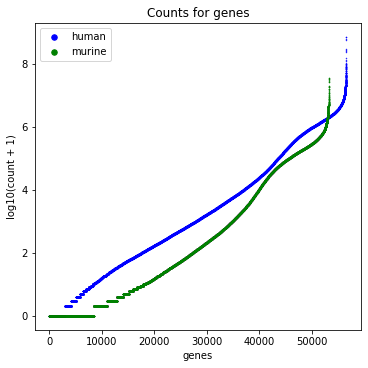

In [9]:
from math import log10

human_counts.sort()
murine_counts.sort()

fig, ax = plt.subplots(figsize=(5,5),layout="constrained")
x1 = list(range(len(human_counts)))
y1 = [log10(h+1.) for h in human_counts]

x2 = list(range(len(murine_counts)))
y2 = [log10(m+1.) for m in murine_counts]
human_line = ax.scatter(x1,y1,s=0.2, color = "blue",label="human")
murine_line = ax.scatter(x2,y2,s=0.2, color = "green", label="murine")

lines = [human_line,murine_line]

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

ax.set_title("Counts for genes")
ax.set_xlabel("genes")
ax.set_ylabel("log10(count + 1)")

 

In [10]:
# there are genes that are inexpressed 
# how many and who? 

assembly_ = assembly.set_index("Geneid")
counts = pd.DataFrame(assembly_.sum(axis = 'columns',numeric_only = True))
counts.columns = ['value']

In [11]:
inexpressed_genes = counts[counts['value'] == 0].index.to_list()
human_inexpressed = [g for g in inexpressed_genes if g[0] == 'H']
murine_inexpressed = [g for g in inexpressed_genes if g[0] == 'M']

print(f"Human inexpressed in the dataset are: {len(human_inexpressed)}")
print(f"Murine inexpressed in the dataset are: {len(murine_inexpressed)}")

Human inexpressed in the dataset are: 2972
Murine inexpressed in the dataset are: 8414


In [12]:

low_expressed_genes = []
samples = assembly.columns.to_list()[1:]
threshold = int(0.2*len(samples))

for index,row in tqdm(assembly.iterrows()):
    values = row[samples].to_list()
    if(np.count_nonzero(values) < threshold):
        low_expressed_genes.append(row['Geneid'])

h_low_expressed = [g for g in low_expressed_genes if g[0] == 'H']
m_low_expressed = [g for g in low_expressed_genes if g[0] == 'M']

print(f"There are {len(low_expressed_genes)} low expressed genes")
print(f"There are {len(h_low_expressed)} HUMAN low expressed genes")
print(f"There are {len(m_low_expressed)} MURINE low expressed genes")


109887it [00:52, 2085.42it/s]

There are 56904 low expressed genes
There are 24905 HUMAN low expressed genes
There are 31999 MURINE low expressed genes


In [13]:
files = os.listdir()
if "human_inexpressed.txt" in files and "murine_inexpressed.txt" in files:
    os.remove("human_inexpressed.txt")
    os.remove("murine_inexpressed.txt")

f = open("human_inexpressed.txt","a")
f.write("GeneId\x0a")
for g in human_inexpressed:
    f.write(g+"\x0a")
f.close()

f = open("murine_inexpressed.txt","a")
f.write("GeneId\x0a")
for g in murine_inexpressed:
    f.write(g+"\x0a")
f.close()

In [14]:
files = os.listdir()
if "human_lowexpressed.txt" in files and "murine_lowexpressed.txt" in files:
    os.remove("human_lowexpressed.txt")
    os.remove("murine_lowexpressed.txt")

f = open("human_lowexpressed.txt","a")
f.write("GeneId\x0a")
for g in h_low_expressed:
    f.write(g+"\x0a")
f.close()

f = open("murine_lowexpressed.txt","a")
f.write("GeneId\x0a")
for g in m_low_expressed:
    f.write(g+"\x0a")
f.close()

In [15]:
# stats 

avg_human_counts = np.average(human_counts)
avg_murine_counts = np.average(murine_counts)
median_human_counts = np.median(human_counts)
median_murine_counts =  np.median(murine_counts)
max_human_counts = np.max(human_counts)
max_murine_counts =  np.max(murine_counts)

print(f"Average human counts: {avg_human_counts}")
print(f"Average murine counts: {avg_murine_counts}")
print(f"Median human counts: {median_human_counts}")
print(f"Median murine counts: {median_murine_counts}")
print(f"Max human counts: {max_human_counts}")
print(f"Max murine counts: {max_murine_counts}")

Average human counts: 559828.820841209
Average murine counts: 79268.7678403844
Median human counts: 1096.0
Median murine counts: 83.0
Max human counts: 721457709.0
Max murine counts: 34953429.0


<h1>Counts sample-wise</h1>

In [16]:
genes = assembly['Geneid'].to_list()
human_genes = [g for g in genes if g[0] == 'H']
murine_genes = [g for g in genes if g[0] == 'M']

human_assembly = assembly[assembly['Geneid'].isin(human_genes)]
murine_assembly = assembly[assembly['Geneid'].isin(murine_genes)]

human_sample_counts = pd.DataFrame(human_assembly.sum(axis = 'rows',numeric_only = True))
murine_sample_counts =  pd.DataFrame(murine_assembly.sum(axis = 'rows',numeric_only = True))

human_sample_counts.columns = ["value"]
murine_sample_counts.columns = ["value"]

Text(0, 0.5, 'count')

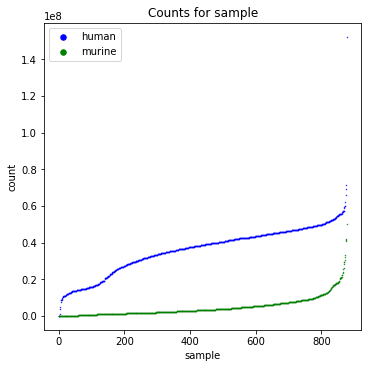

In [17]:
from math import log10

h_counts = human_sample_counts['value'].to_list()
m_counts = murine_sample_counts['value'].to_list()

h_counts.sort()
m_counts.sort()

fig, ax = plt.subplots(figsize=(5,5),layout="constrained")
x1 = list(range(len(h_counts)))
y1 = [h for h in h_counts]

x2 = list(range(len(m_counts)))
y2 = [m for m in m_counts]
human_line = ax.scatter(x1,y1,s=0.2, color = "blue",label="human")
murine_line = ax.scatter(x2,y2,s=0.2, color = "green", label="murine")

lines = [human_line,murine_line]

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

ax.set_title("Counts for sample")
ax.set_xlabel("sample")
ax.set_ylabel("count")

# NOTE: 
# both human and murine counts are sorted, thus for a single 'x' value samples could be different 

In [18]:
avg_human_counts = np.average(h_counts)
avg_murine_counts = np.average(m_counts)
median_human_counts = np.median(h_counts)
median_murine_counts =  np.median(m_counts)
max_human_counts = np.max(h_counts)
max_murine_counts =  np.max(m_counts)
min_human_counts = np.min(h_counts)
min_murine_counts =  np.min(m_counts)

print(f"Average human counts: {avg_human_counts}")
print(f"Average murine counts: {avg_murine_counts}")
print(f"Median human counts: {median_human_counts}")
print(f"Median murine counts: {median_murine_counts}")
print(f"Max human counts: {max_human_counts}")
print(f"Max murine counts: {max_murine_counts}")
print(f"Min human counts: {min_human_counts}")
print(f"Min murine counts: {min_murine_counts}")

Average human counts: 36094931.3428246
Average murine counts: 4810115.504555808
Median human counts: 38552912.0
Median murine counts: 3111618.5
Max human counts: 152296806.0
Max murine counts: 50126822.0
Min human counts: 420.0
Min murine counts: 6.0


In [19]:
# samples with less than 10M counts 

samples_to_filter = human_sample_counts[human_sample_counts.value < 10e6].index.to_list()
print(f"Samples with less than 10M human-reads {len(samples_to_filter)}")

files = os.listdir()
if "sample_to_filter.txt" in files :
    os.remove("sample_to_filter.txt")

f = open("sample_to_filter.txt","a")
f.write("sample\x0a")
for g in samples_to_filter:
    f.write(g+"\x0a")
f.close()


Samples with less than 10M human-reads 12


In [21]:
sample_info = pd.read_csv("../sampleinfo.csv")

In [23]:
sample_info.head()

,SampleName,Type
0,CRC0071LMX0B02204TUMR02000,LMX
1,CRC0269PRX0A01201TUMR01000,PRX
2,CRC0256PRX0A01201TUMR01000,PRX
3,CRC0468LMX0B03010TUMR05000,LMX
4,CRC0333LMX0B02201TUMR02000,LMX


<AxesSubplot:xlabel='Type', ylabel='count'>

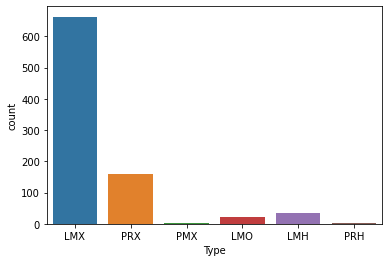

In [27]:
sns.countplot(x="Type", data=sample_info)

In [31]:
lmx_samples = sample_info[sample_info['Type'] == 'LMX'].index.to_list()
prx_samples = sample_info[sample_info['Type'] == 'PRX'].index.to_list()
pmx_samples = sample_info[sample_info['Type'] == 'PMX'].index.to_list()
lmo_samples = sample_info[sample_info['Type'] == 'LMO'].index.to_list()
lmh_samples = sample_info[sample_info['Type'] == 'LMH'].index.to_list()
prh_samples = sample_info[sample_info['Type'] == 'PRH'].index.to_list()

print(f"LMX counts: {len(lmx_samples)}")
print(f"PRX counts: {len(prx_samples)}")
print(f"PMX counts: {len(pmx_samples)}")
print(f"LMO counts: {len(lmo_samples)}")
print(f"LMH counts: {len(lmh_samples)}")
print(f"PRH counts: {len(prh_samples)}")


LMX counts: 663
PRX counts: 158
PMX counts: 1
LMO counts: 22
LMH counts: 33
PRH counts: 1


In [32]:
663+158+1+22+33+1

878